# Running OptMiMiDICE2016R2 

In [1]:
using Pkg
Pkg.activate(".") # activate the current environment

  Activating project at `~/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code`


## Adding OptMimiDICE2016R2 & Mimi to the Directory

<span style="color:red">Need to use only once. </span>

In [ ]:
using Pkg
Pkg.add(url="https://github.com/felixschaumann/OptMimiDICE2016R2.jl")
Pkg.add("Mimi")

In [3]:
Pkg.status()

Status `~/Library/CloudStorage/OneDrive-M365UniversitätHamburg/Semester 4/Environmental Economics/M3 Project/Code/Project.toml`
  [a93c6f00] DataFrames v1.6.1
⌃ [89b67f3b] ExcelFiles v0.6.1
  [033835bb] JLD2 v0.4.48
  [b964fa9f] LaTeXStrings v1.3.1
  [e4e893b0] Mimi v1.5.3
  [f1883be1] OptMimiDICE2016R2 v0.1.1-DEV `https://github.com/felixschaumann/OptMimiDICE2016R2.jl#main`
  [91a5bcdd] Plots v1.40.4
  [fdbf4ff8] XLSX v0.10.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


## Import Packages

In [454]:
using Mimi
using OptMimiDICE2016R2

## Adding the extension

In [549]:
ext = OptMimiDICE2016R2.get_model()
run(ext)

In [550]:
include("./extension.jl")
replace!(ext, :damages => extension);

### The following code is only for setting the parameters for the first run, after that use update_param! 

In [551]:
using JLD2
@load "lambda1.jld2" lambda1 #initial lambda1
@load "adbudget.jld2" adbudget;
@load "calib1.jld2" calib1; #calibrated values for lambda1


In [552]:
set_param!(ext, :damages, :B, adbudget)
set_param!(ext, :damages, :delta1, 0.05)
set_param!(ext, :damages, :l1, calib1.^(1/1.2)) #better calibration using power (1/1.2)
set_param!(ext, :damages, :l2, 0.038)
set_param!(ext, :damages, :flowshare, 0.5 .* ones(100))

### update param

In [553]:
update_param!(ext, :damages, :a1, 0.0012)
update_param!(ext, :damages, :a2, 0.0023)
update_param!(ext, :damages, :a3, 2.32)
update_param!(ext, :l2, 0.19)
update_param!(ext, :flowshare, 0 .* ones(100))

true

In [554]:
run(ext)

In [409]:
explore(ext)

Electron.Window(Application(Base.PipeEndpoint(RawFD(22) paused, 0 bytes waiting), Process(setenv(`/Users/adhitchandy/.julia/artifacts/28d75c9551b709f4f8172bf33e631b433c6c68d6/Julia.app/Contents/MacOS/Julia /Users/adhitchandy/.julia/packages/Electron/LXyZ0/src/main.js /var/folders/pc/yc06blr53r5bkb36yd_0qxpw0000gn/T/jlel-b76f02a62f1511ef26f2b7a77ceb151d /var/folders/pc/yc06blr53r5bkb36yd_0qxpw0000gn/T/jlel-sn-b76f08dc2f1511ef29ebafdf8b39f32d 2SZAqFuVxYfRUqyK0FWBEHh4cCBqv3HKJNgpN+kB1LYv4exGcnCwxIuDkk5Y3/+XxUqrt4OiVHd8LQaAJHWka8bkRz2+fqUBHkc5TV4W9j7WEwjhG8d6QXt3scU38YlCXGqSA34/ES9X28fPwvl575tWzVzWA1Scid8msPEtpRA=`,["XPC_FLAGS=0x0", "COMMAND_MODE=unix2003", "CONDA_PROMPT_MODIFIER=(base) ", "PATH=/opt/anaconda3/bin:/opt/anaconda3/condabin:/Users/adhitchandy/.juliaup/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstr

### Optimizing the Model

In [555]:
@time m_opt, diagn = OptMimiDICE2016R2.optimise_model(ext)

 54.510142 seconds (183.05 M allocations: 7.746 GiB, 0.67% gc time)


(m = Mimi.Model
  Module: Mimi
  Components:
    ComponentId(OptMimiDICE2016R2.totalfactorproductivity)
    ComponentId(OptMimiDICE2016R2.grosseconomy)
    ComponentId(OptMimiDICE2016R2.emissions)
    ComponentId(OptMimiDICE2016R2.co2cycle)
    ComponentId(OptMimiDICE2016R2.radiativeforcing)
    ComponentId(OptMimiDICE2016R2.climatedynamics)
    ComponentId(Main.extension)
    ComponentId(OptMimiDICE2016R2.neteconomy)
    ComponentId(OptMimiDICE2016R2.welfare)
  Dimensions:
    time => [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105, 2110, 2115, 2120, 2125, 2130, 2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185, 2190, 2195, 2200, 2205, 2210, 2215, 2220, 2225, 2230, 2235, 2240, 2245, 2250, 2255, 2260, 2265, 2270, 2275, 2280, 2285, 2290, 2295, 2300, 2305, 2310, 2315, 2320, 2325, 2330, 2335, 2340, 2345, 2350, 2355, 2360, 2365, 2370, 2375, 2380, 2385, 2390, 2395, 2400, 2405, 2410, 2415, 2420, 2425, 2430, 2435

In [524]:
explore(m_opt)

Electron.Window(Application(Base.PipeEndpoint(RawFD(22) paused, 0 bytes waiting), Process(setenv(`/Users/adhitchandy/.julia/artifacts/28d75c9551b709f4f8172bf33e631b433c6c68d6/Julia.app/Contents/MacOS/Julia /Users/adhitchandy/.julia/packages/Electron/LXyZ0/src/main.js /var/folders/pc/yc06blr53r5bkb36yd_0qxpw0000gn/T/jlel-b76f02a62f1511ef26f2b7a77ceb151d /var/folders/pc/yc06blr53r5bkb36yd_0qxpw0000gn/T/jlel-sn-b76f08dc2f1511ef29ebafdf8b39f32d 2SZAqFuVxYfRUqyK0FWBEHh4cCBqv3HKJNgpN+kB1LYv4exGcnCwxIuDkk5Y3/+XxUqrt4OiVHd8LQaAJHWka8bkRz2+fqUBHkc5TV4W9j7WEwjhG8d6QXt3scU38YlCXGqSA34/ES9X28fPwvl575tWzVzWA1Scid8msPEtpRA=`,["XPC_FLAGS=0x0", "COMMAND_MODE=unix2003", "CONDA_PROMPT_MODIFIER=(base) ", "PATH=/opt/anaconda3/bin:/opt/anaconda3/condabin:/Users/adhitchandy/.juliaup/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstr

### Saving necessary data points
The following code has been used and reused to create the files in the folder Extension where necessary data points were saved in the .jld2 format.

In [556]:
damagesEXcalib0 = ext[:damages, :DAMAGES]; #extracting the component values
costEXcalib0 = ext[:damages, :PROTECTIONCOST];
residualdamageEXcalib0 = ext[:damages, :RESIDUALDAM];
grossdamagesEXcalib0 = ext[:damages, :GROSSDAM];
benefitEXcalib0 = ext[:damages, :ADAPT];

In [557]:
@save "benefitEXcalib0.jld2" benefitEXcalib0 #saving values

In [558]:
@save "damagesEXcalib0.jld2" damagesEXcalib0
@save "grossdamagesEXcalib0.jld2" grossdamagesEXcalib0
@save "residualdamageEXcalib0.jld2" residualdamageEXcalib0
@save "costEXcalib0.jld2" costEXcalib0


In [330]:
using Plots
using LaTeXStrings

In [562]:
calib1 = JLD2.load("./calib1.jld2")["calib1"];

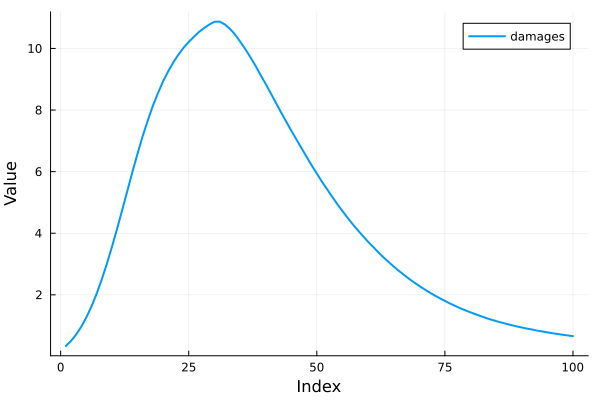

In [563]:
plot(1:100, calib1.^1.2, label="damages", xlabel="Index", ylabel="Value", linewidth=2)
plot!() # This line is used to actually display the plot